In [1]:
import pandas
import utils

df = pandas.read_csv("../data/survey2024_headerscleaned.csv")

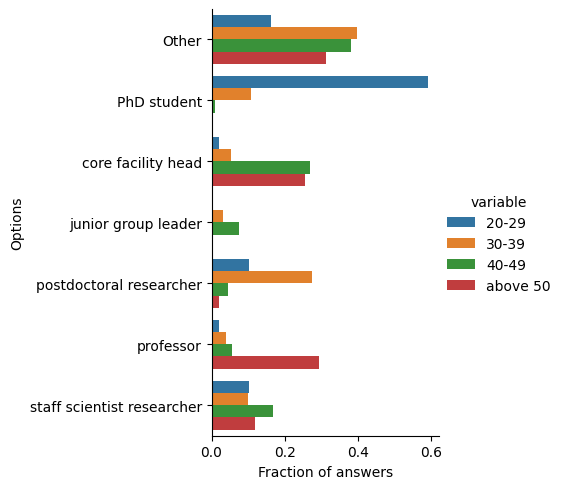

In [2]:
more_than_5_answers = ['PhD student','staff scientist researcher','core facility head','postdoctoral researcher','professor','junior group leader']

utils.select_all_that_apply_hist_facet(df,
                                       'Which of these describe your position Choose all options that apply',
                                       '../figures/PositionByAge',
                                       facet_col="What is your age group",
                                       create_other=more_than_5_answers,
                                       how='color')

/home/alessandro/mambaforge/envs/globias/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


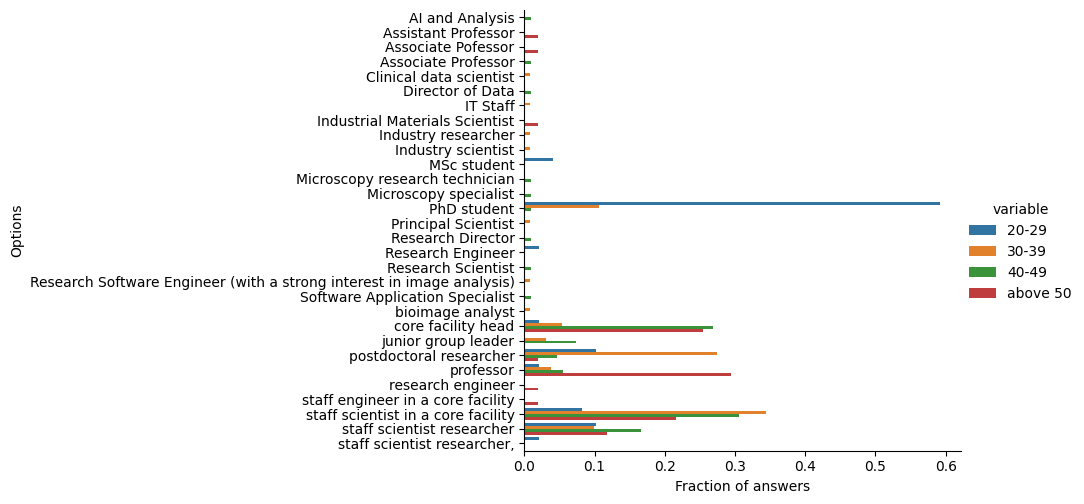

In [3]:
utils.select_all_that_apply_hist_facet(df,
                                       'Which of these describe your position Choose all options that apply',
                                       '../figures/PositionByAge_noothers',
                                       facet_col="What is your age group",
                                       how='color')

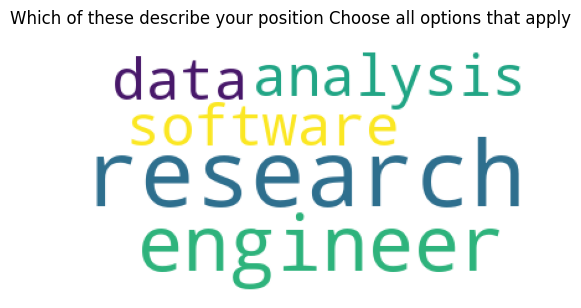

In [4]:
stop_words = []
for x in more_than_5_answers:
    stop_words += x.split(' ')

utils.wordcloud_func(df=df,col_name='Which of these describe your position Choose all options that apply',
                     new_stop_list=stop_words,plot_filename='../figures/PositionsOtherAnswers.png'
)

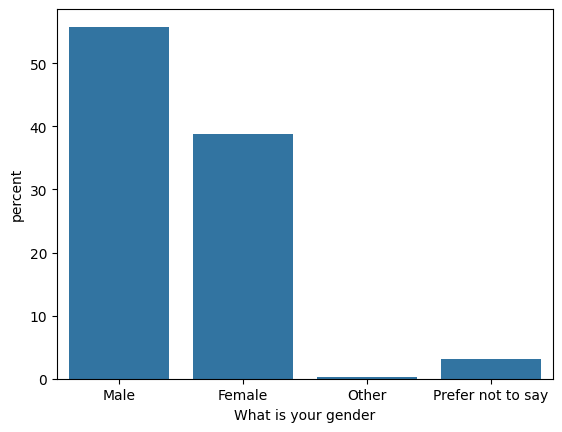

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='What is your gender',stat='percent',order = ["Male", "Female", "Other", "Prefer not to say"])
plt.savefig('../figures/gender_percent.png')
plt.savefig('../figures/gender_percent.svg')

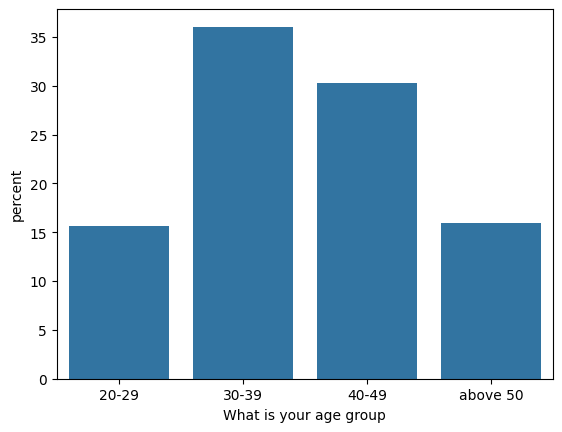

In [6]:
sns.countplot(data=df,x='What is your age group',stat='percent',order=["20-29","30-39","40-49","above 50"])
plt.savefig('../figures/age_percent.png')
plt.savefig('../figures/age_percent.svg')

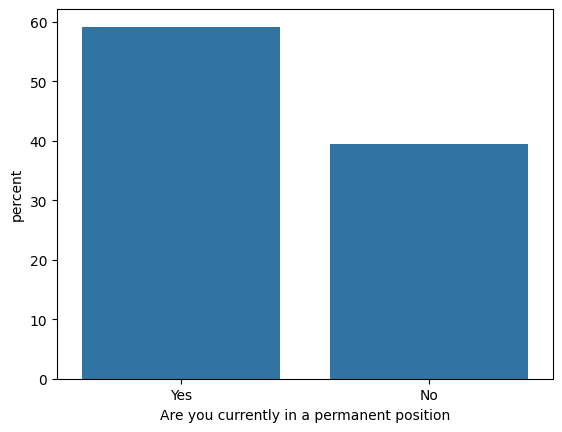

In [7]:
sns.countplot(data=df,x='Are you currently in a permanent position',stat='percent',order=["Yes","No"])
plt.savefig('../figures/permanent_percent.png')
plt.savefig('../figures/permanent_percent.svg')

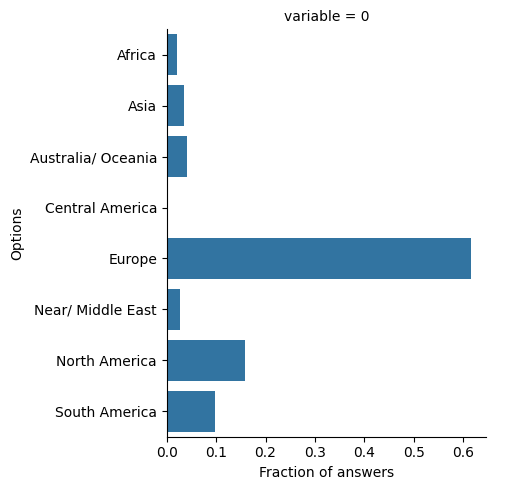

In [8]:
utils.select_all_that_apply_hist_facet(df,
                                       'What is your location',
                                       '../figures/Continent_bar',)

In [ ]:
df["Outside North America/Europe"] = df["What is your location"].apply(lambda loc: "No" if loc in ["North America", "Europe"] else ("Yes" if loc != "" else ""))

0       No
1       No
2      Yes
3       No
4       No
      ... 
289     No
290    Yes
291       
292       
293       
Name: Outside North America/Europe, Length: 294, dtype: object


In [67]:
print("Total entries:", len(df["What is your location"]))
print("Available data entries:", (df["What is your location"] != "").sum())

print("\n")

print("In North America or Europe:", ((df["What is your location"] == "Europe") | (df["What is your location"] == "North America")).sum())
print("In North America or Europe, and willing:", ((df["Outside North America/Europe"].str.lower() == "no") & (df["Q13 If there was a society such as GloBIAS advocating Bioimage Analysis BIA and offering events as discussed above Q10, would you be interested to be an active member by helping to organise and run regular online events for GloBIAS"].str.lower() == "yes")).sum())
print("percentage will in North America+Europe", round(121.0/224*100))

print("\n")

print("Not in North America or Europe:", ((df["What is your location"] != "Europe") & (df["What is your location"] != "North America") & (df["What is your location"] != "")).sum())
print("Outside North America or Europe, and willing:", ((df["Outside North America/Europe"].str.lower() == "yes") & (df["Q13 If there was a society such as GloBIAS advocating Bioimage Analysis BIA and offering events as discussed above Q10, would you be interested to be an active member by helping to organise and run regular online events for GloBIAS"].str.lower() == "yes")).sum())
print("percentage willing outside North America+Europe", round(36.0/65*100))


Total entries: 294
Available data entries: 289


In North America or Europe: 224
In North America or Europe, and willing: 121
percentage will in North America+Europe 54


Not in North America or Europe: 65
Outside North America or Europe, and willing: 36
percentage willing outside North America+Europe 55


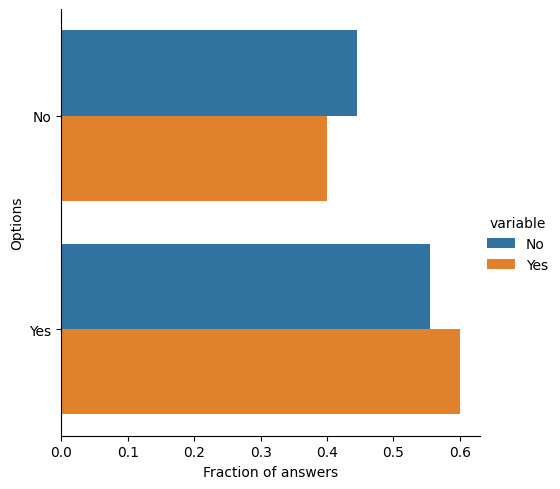

In [56]:
utils.select_all_that_apply_hist_facet(df,
                                       'Q13 If there was a society such as GloBIAS advocating Bioimage Analysis BIA and offering events as discussed above Q10, would you be interested to be an active member by helping to organise and run regular online events for GloBIAS',
                                       '../figures/willing_to_organise_events',
                                       facet_col="Outside North America/Europe",
                                       drop_empty=True,
                                       how='color')